In [1]:
from sklearn import metrics
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import joblib

In [2]:
data = pd.read_csv("E:\\الكلية\\Graduation project\\missing_people.csv")
data

,PatientID,N_Image,Name,Age,Gender,longitude,latitude,Address_of_loss_person,Current_City,Name_Person,N_phone
0,1,1.jpg,محمد حسن الصايم,5,ولد,29.968919,30.926739,السادس من اكتوبر- القاهره,القاهرة,مصطفى احمد عويس,NaN
1,2,2.jpg,شهد عيد عبيد,7,بنت,30.902301,29.550407,برج العرب - الاسكندريه,الإسكندرية,رشا احمد عيد,1.000333e+09
2,3,3.jpg,حسين السيد شكر,7,ولد,31.041573,30.472565,دمنهور - البحيره,البحيرة,عبدالخالق خضر حماده,1.005345e+09
3,4,4.jpg,شيماء جمال عوض,7,بنت,31.227693,30.565751,قوه - كفر الشيخ,كفر الشيخ,عبدالوهاب شبل الجيار,1.094837e+09
4,5,5.jpg,سامى احمد صدقه,5,ولد,31.416094,31.815278,دمياط - دمياط,دمياط,فاطمة راضى الهوارى,1.007569e+09
...,...,...,...,...,...,...,...,...,...,...,...
994,995,995.jpg,احمد مغربي ساري,5,ولد,24.089038,32.900451,اسوان - اسوان,أسوان,معاذ رائد شعبان,1.503009e+09
995,996,996.jpg,رؤي احمد علي,3,بنت,30.785955,31.001761,طنطا - الغربية,الغربية,محمد فهمي الزنقلي,1.503009e+09
996,997,997.jpg,نور زكريا احمد,4,ولد,30.551413,31.010898,شبين الكوم - المنوفية,المنوفية,عبدالله عبده عبدالحميد الحفناوي,1.504009e+09
997,998,998.jpg,امانى عبدالعال جلال,5,بنت,30.190670,31.136269,القناطر الخيريه - القليوبيه,القليوبية,مسعوده عبدالمجيد ابوالحسن,1.504009e+09


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               999 non-null    int64  
 1   N_Image                 999 non-null    object 
 2   Name                    999 non-null    object 
 3   Age                     999 non-null    int64  
 4   Gender                  999 non-null    object 
 5   longitude               999 non-null    float64
 6   latitude                999 non-null    float64
 7   Address_of_loss_person  995 non-null    object 
 8   Current_City            999 non-null    object 
 9   Name_Person             999 non-null    object 
 10  N_phone                 998 non-null    float64
dtypes: float64(3), int64(2), object(6)
memory usage: 86.0+ KB


In [4]:
# data = data.drop(999)

In [5]:
# Specify the column name
column_name = 'Age'
# Edit the phone numbers in the column
data[column_name] = data[column_name].astype(int)  # Convert to string type if necessary

In [6]:
# Specify the column name
column_name = 'PatientID'
# Edit the phone numbers in the column
data[column_name] = data[column_name].astype(int)  # Convert to string type if necessary

In [7]:
# Specify the column name
column_name = 'N_phone'
# Edit the phone numbers in the column
data[column_name] = data[column_name].astype(str)  # Convert to string type if necessary
data[column_name] = '0' + data[column_name]  # Add leading zero
# Display the updated dataset
data

,PatientID,N_Image,Name,Age,Gender,longitude,latitude,Address_of_loss_person,Current_City,Name_Person,N_phone
0,1,1.jpg,محمد حسن الصايم,5,ولد,29.968919,30.926739,السادس من اكتوبر- القاهره,القاهرة,مصطفى احمد عويس,0nan
1,2,2.jpg,شهد عيد عبيد,7,بنت,30.902301,29.550407,برج العرب - الاسكندريه,الإسكندرية,رشا احمد عيد,01000333349.0
2,3,3.jpg,حسين السيد شكر,7,ولد,31.041573,30.472565,دمنهور - البحيره,البحيرة,عبدالخالق خضر حماده,01005345291.0
3,4,4.jpg,شيماء جمال عوض,7,بنت,31.227693,30.565751,قوه - كفر الشيخ,كفر الشيخ,عبدالوهاب شبل الجيار,01094836501.0
4,5,5.jpg,سامى احمد صدقه,5,ولد,31.416094,31.815278,دمياط - دمياط,دمياط,فاطمة راضى الهوارى,01007569010.0
...,...,...,...,...,...,...,...,...,...,...,...
994,995,995.jpg,احمد مغربي ساري,5,ولد,24.089038,32.900451,اسوان - اسوان,أسوان,معاذ رائد شعبان,01503009098.0
995,996,996.jpg,رؤي احمد علي,3,بنت,30.785955,31.001761,طنطا - الغربية,الغربية,محمد فهمي الزنقلي,01503009099.0
996,997,997.jpg,نور زكريا احمد,4,ولد,30.551413,31.010898,شبين الكوم - المنوفية,المنوفية,عبدالله عبده عبدالحميد الحفناوي,01504009090.0
997,998,998.jpg,امانى عبدالعال جلال,5,بنت,30.190670,31.136269,القناطر الخيريه - القليوبيه,القليوبية,مسعوده عبدالمجيد ابوالحسن,01504009091.0


In [8]:
# Fit the KMeans model
kmeans = KMeans(n_clusters=150, random_state=42, tol=0.01)
data['cluster_label'] = kmeans.fit_predict(data[['longitude', 'latitude']])

In [9]:
# Save the KMeans model
joblib.dump(kmeans, 'kmeans_model.pkl')

['kmeans_model.pkl']

In [10]:
filename = 'data.csv'
data.to_csv(filename, index=False)

In [11]:
# Calculate silhouette scores
silhouette_train = silhouette_score(data[['longitude', 'latitude']], data['cluster_label'])
print("The train score is:", silhouette_train)

The train score is: 0.8439139458117335


In [12]:
data

,PatientID,N_Image,Name,Age,Gender,longitude,latitude,Address_of_loss_person,Current_City,Name_Person,N_phone,cluster_label
0,1,1.jpg,محمد حسن الصايم,5,ولد,29.968919,30.926739,السادس من اكتوبر- القاهره,القاهرة,مصطفى احمد عويس,0nan,60
1,2,2.jpg,شهد عيد عبيد,7,بنت,30.902301,29.550407,برج العرب - الاسكندريه,الإسكندرية,رشا احمد عيد,01000333349.0,126
2,3,3.jpg,حسين السيد شكر,7,ولد,31.041573,30.472565,دمنهور - البحيره,البحيرة,عبدالخالق خضر حماده,01005345291.0,19
3,4,4.jpg,شيماء جمال عوض,7,بنت,31.227693,30.565751,قوه - كفر الشيخ,كفر الشيخ,عبدالوهاب شبل الجيار,01094836501.0,113
4,5,5.jpg,سامى احمد صدقه,5,ولد,31.416094,31.815278,دمياط - دمياط,دمياط,فاطمة راضى الهوارى,01007569010.0,123
...,...,...,...,...,...,...,...,...,...,...,...,...
994,995,995.jpg,احمد مغربي ساري,5,ولد,24.089038,32.900451,اسوان - اسوان,أسوان,معاذ رائد شعبان,01503009098.0,53
995,996,996.jpg,رؤي احمد علي,3,بنت,30.785955,31.001761,طنطا - الغربية,الغربية,محمد فهمي الزنقلي,01503009099.0,66
996,997,997.jpg,نور زكريا احمد,4,ولد,30.551413,31.010898,شبين الكوم - المنوفية,المنوفية,عبدالله عبده عبدالحميد الحفناوي,01504009090.0,83
997,998,998.jpg,امانى عبدالعال جلال,5,بنت,30.190670,31.136269,القناطر الخيريه - القليوبيه,القليوبية,مسعوده عبدالمجيد ابوالحسن,01504009091.0,140


In [13]:
new_data = pd.DataFrame({'longitude': [26.519692105154714], 'latitude': [31.740299259723983]})
predicted_labels = kmeans.predict(new_data)

number = predicted_labels[0]
print(number)

24


In [15]:
matched_labels = data[data['cluster_label'].isin(predicted_labels)]
matched_labels

,PatientID,N_Image,Name,Age,Gender,longitude,latitude,Address_of_loss_person,Current_City,Name_Person,N_phone,cluster_label
37,38,38.jpg,اسراء ابراهيم جمعه,5,بنت,26.567926,31.746036,اخميم - سوهاج,سوهاج,احمد زين محمد محمود,01004444004.0,24
39,40,40.jpg,هيام قنديل حافظ,8,بنت,26.556923,31.682060,سوهاج - سوهاج,سوهاج,عبدالفتاح ابراهيم محمد,01222173341.0,24
109,110,110.jpg,منال رجب الخولى,3,بنت,26.578361,31.749127,اخميم - سوهاج,سوهاج,صبحي السيد رجب,01103000050.0,24
347,348,348.jpg,رنا خالد سعيد,3,بنت,26.559073,31.699400,سوهاج - سوهاج,سوهاج,مليكه احمد عبداللطيف,01009000201.0,24
482,483,483.jpg,بدر محمد عبد الصادق,3,ولد,26.562548,31.744664,اخميم - سوهاج,سوهاج,عبدالباسط محمد عبدالمولي,01002000406.0,24
484,485,485.jpg,ادهم احمد ابوزيد,5,ولد,26.562855,31.744664,اخميم - سوهاج,سوهاج,محمود فتح الله خليفه,01002000408.0,24
554,555,555.jpg,احمد امين طلبه عتمان,3,ولد,26.559687,31.694422,سوهاج - سوهاج,سوهاج,دنيا عبدالله مصطفي,01009000408.0,24
817,818,818.jpg,امل خميس رجب,5,بنت,26.564083,31.743978,اخميم -سوهاج,سوهاج,نور عبدالمولي الحمامصي,01506007071.0,24
966,967,967.jpg,سمير عبدالغني محمد,4,ولد,26.558766,31.696825,سوهاج - سوهاج,سوهاج,نورالدين محمد عوض,01501009090.0,24
989,990,990.jpg,سحر عبدالعزيز شهود,3,بنت,26.566233,31.743634,اخميم - سوهاج,سوهاج,رمضان حسام الدين رمضان,01503009093.0,24


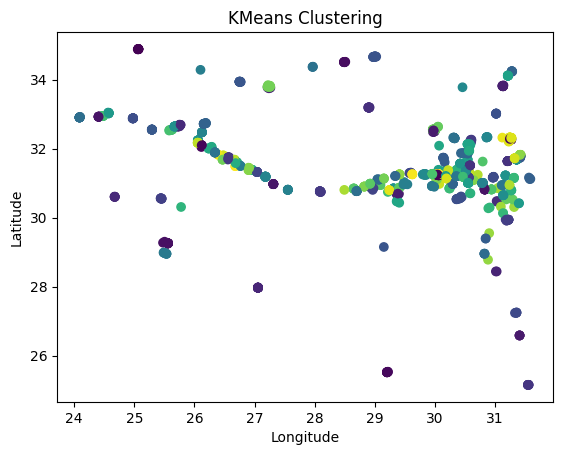

In [20]:
import matplotlib.pyplot as plt

# Plot the clusters
plt.scatter(data['longitude'], data['latitude'], c=data['cluster_label'], cmap='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('KMeans Clustering')
plt.show()